In [ ]:
library(ggplot2)
library(gridExtra)
library(reshape)

theme_set(theme_gray(base_size = 18))

data2030$Residual[data2030$Residual<=0] =0

#################################
########2030 PLOTS
###############################



##############################################################
########Subset for 2030 regression prices part
#############################################################

data2030sub=data.frame(data2030[1:8760,])
fit_model=data.frame("Predicted_Price)"=predictmodelMAR[1:8760,])
df3=data.frame(data2030sub$nbHours,"Predicted_Price"=fit_model)
melted3=melt(df3,id.vars="data2030sub.nbHours",variable.name = 'series')


price_30=ggplot(melted3, aes(x=data2030sub.nbHours, y=value, group=variable,colour=variable)) + 
  geom_line(size=1.05)+
  theme(legend.title=element_blank())+
  xlab("Hour of the Year (2030)")+
  ylab("Electricity Price (\u20ac/MWh)")+
  xlim( 1000,1200)+
  ylim(-100,100)+
  geom_hline(yintercept=0, linetype="dashed",color = "black", size=0.5)+
  scale_colour_manual(values = c("#00bfc4"))
  #stat_smooth(color= "#2e4053")





##############################################################
########2030 stacked area
#############################################################
library(reshape)
library(ggplot2)
library(gridExtra)

data2030s<- read.csv("2030_stacked.csv")


data_all=read.csv('2030_stacked.csv', header = TRUE)
data_all=data_all/1000
data_pos=data.frame("Lignite"=data_all$Lignite,"F_other"=data_all$F_Other,"Coal"=data_all$Coal,"CCGT"=data_all$CCGT,"OCGT"=data_all$OCGT,"Oil"=data_all$Oil,"Pumped_Water"= data_all$Pumped_Water)
data_neg=data.frame("Negative_Residual"=data_all$Negative_Residual)
# The palette with grey:
#cbPalette = c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# The palette with black:
#cbPalette1 = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

#Positive
p.dat<-data.frame(step=row.names(data_pos),data_pos,stringsAsFactors=F)
p.dat<-melt(p.dat,id='step')
p.dat$step<-as.numeric(p.dat$step)

p.dat2<-data.frame(step=row.names(data_neg),data_neg,stringsAsFactors=F)
p.dat2<-melt(p.dat2,id='step')
p.dat2$step<-as.numeric(p.dat2$step)



stacked=ggplot()+
  geom_area(data = p.dat2, aes(x=step, y=value, fill=variable))+
  geom_area(data = p.dat, aes(x=step, y=value, fill=variable))+
  geom_line(data=data2030,aes(x=nbHours,y=wind_ger/1000),colour = "#3498db", size = 1.1)+
  theme(legend.title=element_blank())+
  xlab(" Hour of the Year (2030)") +
  ylab("Generation GW") +
  xlim(1000,1200)+
  annotate("text", x = 1190, y = 62, label = "-Wind",color="#3498db",size=6.5)





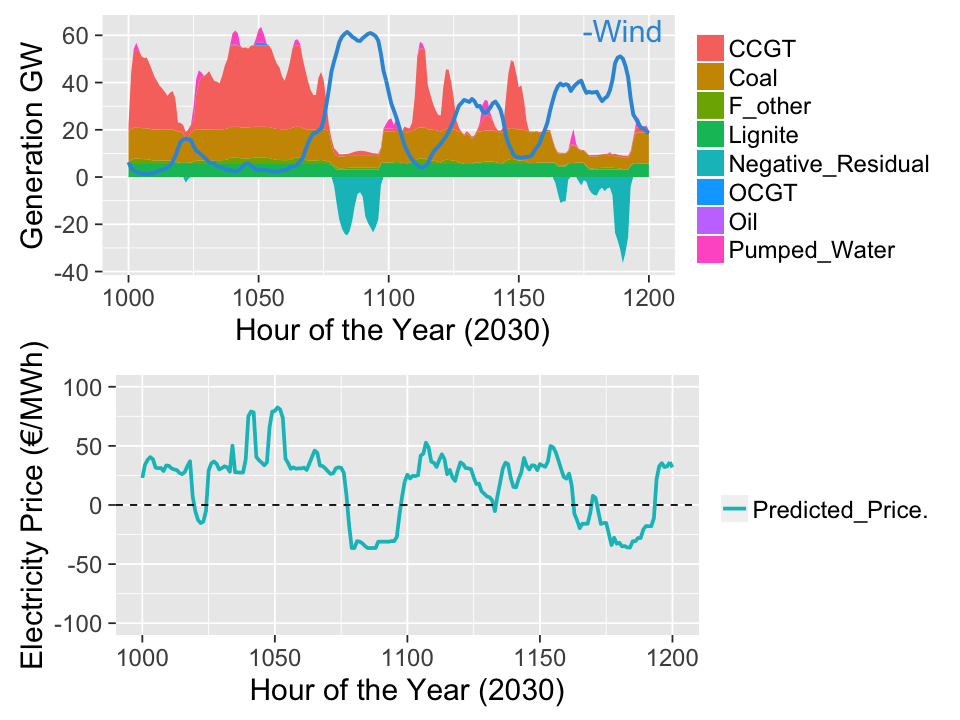

In [9]:
options(warn=-1)
library(repr)
both=grid.arrange(stacked,price_30)

# Change plot size to 4 x 3
options(repr.plot.width=8, repr.plot.height=6)


